In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [32]:
random.seed(10)

In [33]:
X_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/resume_categorization/dataset/processed_dataset/train_aug.csv")
X_valid = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/resume_categorization/dataset/processed_dataset/val.csv")


In [34]:

encoder=LabelEncoder()
# encoding and transfrom
X_train['Category']=encoder.fit_transform(X_train['Category'])
X_valid['Category']=encoder.fit_transform(X_valid['Category'])

In [35]:
X_train.head()

,Unnamed: 0,ID,Category,Cleaned_Resume
0,0,20993320,19,hr coordinator summary from my first job as a ...
1,1,33872500,7,financial institutions examiner summary well r...
2,2,15145575,8,it support officer executive profile seeking a...
3,3,25101183,16,director of finance accomplishments senior fin...
4,4,11480899,19,hr manager summary human resources manager wit...


In [36]:
#import TfidfVectorizer for vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tfidf=TfidfVectorizer(stop_words='english',max_features=800)

In [38]:
#fit and transfrom all dataset
tfidf_train_vectors = tfidf.fit_transform(X_train['Cleaned_Resume'])
tfidf_valid_vectors =tfidf.transform(X_valid['Cleaned_Resume'])

In [39]:
tfidf_train_vectors.shape

(2207, 800)

In [40]:
# extracting feature names
tfidf.get_feature_names_out()

array(['ability', 'able', 'academic', 'access', 'accomplishments',
       'accordance', 'according', 'account', 'accountant', 'accounting',
       'accounts', 'accuracy', 'accurate', 'accurately', 'achieve',
       'achieved', 'action', 'active', 'activities', 'activity', 'ad',
       'additional', 'administration', 'administrative', 'administrator',
       'adobe', 'advanced', 'advertising', 'affiliations', 'agencies',
       'agency', 'aid', 'air', 'aircraft', 'american', 'analysis',
       'analyst', 'analytical', 'analytics', 'analyze', 'analyzed',
       'annual', 'answered', 'application', 'applications', 'applied',
       'appropriate', 'april', 'area', 'areas', 'art', 'arts', 'aspects',
       'assessment', 'assets', 'assigned', 'assist', 'assistance',
       'assistant', 'assisted', 'assisting', 'associate', 'associates',
       'association', 'assurance', 'attention', 'audit', 'audits',
       'august', 'aviation', 'award', 'awards', 'awareness', 'bachelor',
       'backgroun

In [41]:
# store all model and accuracy values

accuracy_lis=[]
model_lis=[]

In [42]:
y_train = X_train['Category']
y_valid = X_valid['Category']

## **Random Forest classifier**

In [43]:
#import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(tfidf_train_vectors,y_train)
# Predict on validation data
y_val_pred = RF.predict(tfidf_valid_vectors)


# Print classification report for validation data
print("Classification Report (Validation Data):\n")
print(classification_report(y_valid, y_val_pred))

accuracy=accuracy_score(y_valid, y_val_pred)
print("Accuracy is : ", accuracy)

# store info
model_lis.append("Random Forest Classifier")
accuracy_lis.append(accuracy*100)

Classification Report (Validation Data):

              precision    recall  f1-score   support

           0       0.62      0.83      0.71        12
           1       0.33      0.25      0.29        12
           2       1.00      0.29      0.44         7
           3       0.33      0.20      0.25        10
           4       0.67      0.20      0.31        10
           5       0.50      0.25      0.33         4
           6       0.77      0.83      0.80        12
           7       0.73      0.73      0.73        11
           8       0.00      0.00      0.00         2
           9       0.47      0.67      0.55        12
          10       0.85      0.92      0.88        12
          11       0.83      0.91      0.87        11
          12       0.50      0.18      0.27        11
          13       0.92      1.00      0.96        11
          14       0.78      0.70      0.74        10
          15       0.75      0.75      0.75        12
          16       0.67      0.67      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Logistic Regresssion**

In [44]:
from sklearn.linear_model import LogisticRegression
# lR

LR = LogisticRegression()

LR.fit(tfidf_train_vectors,y_train)
# Predict on validation data
y_val_pred = LR.predict(tfidf_valid_vectors)

# Print classification report for validation data
print("Classification Report (Validation Data):\n")
print(classification_report(y_valid, y_val_pred))

print("Accuracy is : ", accuracy_score(y_valid, y_val_pred))

# store info
model_lis.append("Logistic Regression")
accuracy_lis.append(accuracy_score(y_valid, y_val_pred)*100)

Classification Report (Validation Data):

              precision    recall  f1-score   support

           0       0.53      0.75      0.62        12
           1       0.36      0.33      0.35        12
           2       0.44      0.57      0.50         7
           3       0.25      0.10      0.14        10
           4       0.40      0.20      0.27        10
           5       0.20      0.25      0.22         4
           6       0.73      0.67      0.70        12
           7       0.89      0.73      0.80        11
           8       1.00      1.00      1.00         2
           9       0.48      0.83      0.61        12
          10       0.91      0.83      0.87        12
          11       0.90      0.82      0.86        11
          12       0.60      0.27      0.37        11
          13       0.91      0.91      0.91        11
          14       0.56      0.50      0.53        10
          15       0.82      0.75      0.78        12
          16       0.86      0.50      

### **K-Nearest Neighbors**

In [45]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize KNN classifier
k = 24 # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier
knn_classifier.fit(tfidf_train_vectors,y_train)

# Predict on validation data
y_val_pred = knn_classifier.predict(tfidf_valid_vectors)

# Print classification report for validation data
print("Classification Report (Validation Data):\n")
print(classification_report(y_valid, y_val_pred))

print("Accuracy is : ", accuracy_score(y_valid, y_val_pred))

# store info
model_lis.append("K Nearest Neighbors")
accuracy_lis.append(accuracy_score(y_valid, y_val_pred)*100)

Classification Report (Validation Data):

              precision    recall  f1-score   support

           0       0.45      0.75      0.56        12
           1       0.30      0.25      0.27        12
           2       0.33      0.14      0.20         7
           3       0.50      0.10      0.17        10
           4       0.00      0.00      0.00        10
           5       0.25      0.50      0.33         4
           6       0.80      0.67      0.73        12
           7       0.70      0.64      0.67        11
           8       0.14      0.50      0.22         2
           9       0.45      0.83      0.59        12
          10       0.91      0.83      0.87        12
          11       0.73      0.73      0.73        11
          12       0.00      0.00      0.00        11
          13       0.90      0.82      0.86        11
          14       0.50      0.40      0.44        10
          15       0.80      0.67      0.73        12
          16       0.57      0.33      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Naive Bayes**

In [46]:
from sklearn.naive_bayes import MultinomialNB
# Initialize NB classifier
nb_classifier = MultinomialNB()

# Train the KNN classifier
nb_classifier.fit(tfidf_train_vectors,y_train)

# Predict on validation data
y_val_pred = nb_classifier.predict(tfidf_valid_vectors)

# Print classification report for validation data
print("Classification Report (Validation Data):\n")
print(classification_report(y_valid, y_val_pred))

print("Accuracy is : ", accuracy_score(y_valid, y_val_pred))

# store info
model_lis.append("Naive Bayes")
accuracy_lis.append(accuracy_score(y_valid, y_val_pred)*100)

Classification Report (Validation Data):

              precision    recall  f1-score   support

           0       0.43      0.75      0.55        12
           1       0.33      0.33      0.33        12
           2       0.33      0.43      0.38         7
           3       0.25      0.10      0.14        10
           4       0.00      0.00      0.00        10
           5       0.33      0.25      0.29         4
           6       0.80      0.67      0.73        12
           7       0.80      0.73      0.76        11
           8       0.00      0.00      0.00         2
           9       0.41      0.75      0.53        12
          10       0.90      0.75      0.82        12
          11       0.73      0.73      0.73        11
          12       1.00      0.09      0.17        11
          13       0.91      0.91      0.91        11
          14       0.60      0.60      0.60        10
          15       0.64      0.58      0.61        12
          16       0.60      0.25      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Summarization of the models and accuracy**

In [49]:
# Add bert-transformer base model
model_lis.append("Bert_Transformer")
accuracy_lis.append(84.34)

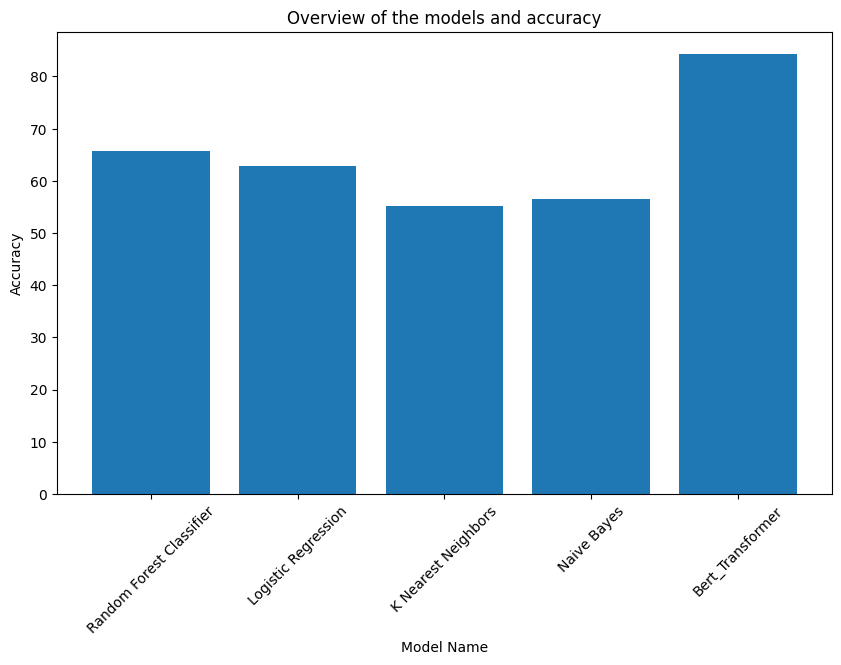

In [50]:
# Create a DataFrame
accuracy_data = pd.DataFrame({'model': model_lis, 'accuracy': accuracy_lis})

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(accuracy_data['model'], accuracy_data['accuracy'])
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Overview of the models and accuracy')
plt.show()